In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,2,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.1,y.shape)
    return X, y.reshape((-1,1))

In [3]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [4]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.4041, -2.0065]) 
label: tensor([8.0727])


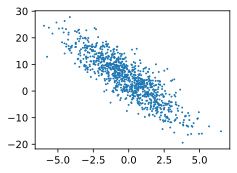

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [6]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [7]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.3391,  1.8766],
        [ 0.1201, -2.5304],
        [-0.7914, -0.9637],
        [-1.4477, -1.7798],
        [ 4.1040,  1.1440],
        [ 0.4310,  0.7036],
        [ 0.8947,  0.9025],
        [ 0.7030, -2.0825],
        [-1.4400,  0.2181],
        [-2.5807, -0.7783]]) 
 tensor([[-4.9849],
        [13.0566],
        [ 5.8232],
        [ 7.3446],
        [ 8.5791],
        [ 2.6232],
        [ 2.9374],
        [12.8045],
        [ 0.5741],
        [ 1.6113]])


In [8]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [9]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [10]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [11]:
def sgd(params,lr,batch_size):
    # 在内部禁止计算梯度（因为梯度计算已经在反向传播中完成了）
    with torch.no_grad():
        for param in params:
            # 实现随机梯度下降
            param -= lr*param.grad/batch_size
            # 记得梯度清零
            param.grad.zero_()

In [12]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

In [13]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        # 反向传播来计算参数的梯度
        l.sum().backward()
        # 使用小批量随机梯度下降迭代模型参数
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train1 = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss={float(train1.mean()):f}')

epoch1,loss=0.023398
epoch2,loss=0.005244
epoch3,loss=0.005081


In [14]:
print(f'w的估计误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b-b}')

w的估计误差:tensor([0.0013, 0.0021], grad_fn=<SubBackward0>)
b的估计误差:tensor([-0.0031], grad_fn=<RsubBackward1>)
